In [1]:
from modules.random_forest import test
from sklearn.ensemble import RandomForestClassifier
from modules.utils import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from eli5.sklearn import PermutationImportance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = load_dataset('data/train_set.csv', is_order=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
random_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
print(f'Exactitude {random_clf.score(X_train, y_train)}')

Exactitude 1.0


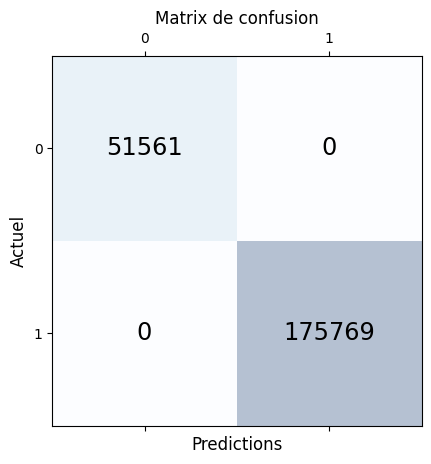

In [4]:
y_pred = random_clf.predict(X_test)
matrix, scores_ensemble, ruo_curve_val = test(y_test, y_pred)

fig, ax = plt.subplots()
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuel', fontsize=12)
plt.title('Matrix de confusion', fontsize=12);

####  Test Resultat 

In [5]:
view_scores = pd.DataFrame(scores_ensemble, index=[0])
view_scores

,precision,error,f1-score,recall,accuracy,roc_auc_score
0,1.0,0.0,1.0,1.0,1.0,1.0


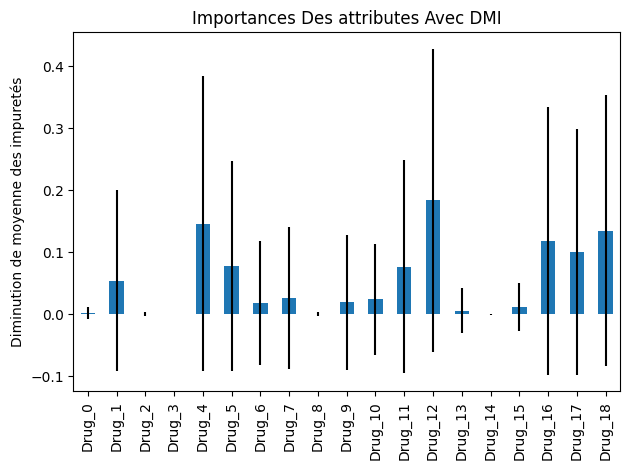

In [6]:
feature_names = np.array([f'Drug_{x}' for x in range(19)])
importances = random_clf.feature_importances_
importances_std = np.std([tree.feature_importances_ for tree in random_clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances_std, ax=ax)
ax.set_title("Importances Des attributes Avec DMI")
ax.set_ylabel("Diminution de moyenne des impuretés")
fig.tight_layout()


In [7]:
selection_importance = SelectFromModel(random_clf)

X_train_from_mdi = selection_importance.transform(X_train)
X_test_from_mdi = selection_importance.transform(X_test)

label_select = feature_names[selection_importance.get_support()] 

print(f'Selection Par DMI {label_select}')

Selection Par DMI ['Drug_1' 'Drug_4' 'Drug_5' 'Drug_11' 'Drug_12' 'Drug_16' 'Drug_17'
 'Drug_18']


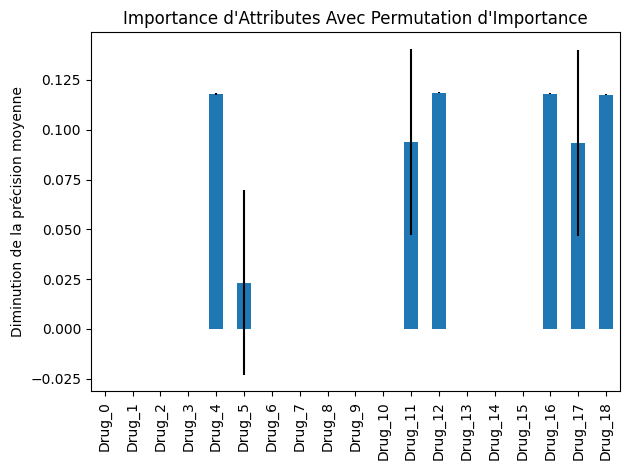

In [8]:
perm = PermutationImportance(RandomForestClassifier(random_state=42, n_jobs=-1), random_state=42, cv=5)
perm.fit(X, y)

selection_importance_DPM = SelectFromModel(
    perm,
    threshold=0.05,
).fit(X_test, y_test)


importances_pt = pd.Series(perm.feature_importances_ , index=feature_names)

fig, ax = plt.subplots()
importances_pt.plot.bar(yerr=perm.feature_importances_std_, ax=ax)
ax.set_title("Importance d'Attributes Avec Permutation d'Importance")
ax.set_ylabel("Diminution de la précision moyenne")
fig.tight_layout()
plt.show()

In [9]:
X_train_from_dpm = selection_importance_DPM.transform(X_train)
X_test_from_dpm = selection_importance_DPM.transform(X_test)

label_select = feature_names[selection_importance_DPM.get_support()] 

print(f'Selection Par DPM {label_select}')

Selection Par DPM ['Drug_4' 'Drug_12' 'Drug_18']


#### Evaluation de Random Forest Avec Selection de DMI

In [10]:
random_clf_dmi = RandomForestClassifier(random_state=42).fit(X_train_from_mdi, y_train)
print(f'Exactitude {random_clf_dmi.score(X_train_from_mdi, y_train)}')

Exactitude 1.0


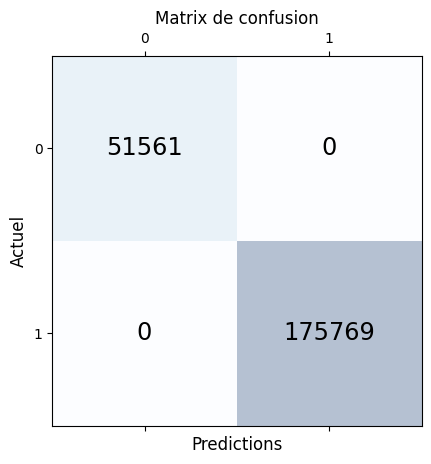

In [11]:
y_pred = random_clf_dmi.predict(X_test_from_mdi)
matrix, scores_ensemble_dmi, ruo_curve_val = test(y_test, y_pred)

fig, ax = plt.subplots()
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuel', fontsize=12)
plt.title('Matrix de confusion', fontsize=12);

In [12]:
view_scores = pd.DataFrame(scores_ensemble_dmi, index=[0])
view_scores

,precision,error,f1-score,recall,accuracy,roc_auc_score
0,1.0,0.0,1.0,1.0,1.0,1.0


#### Evaluation de Random Forest Avec Selection de DPM

In [13]:
random_clf_dpm = RandomForestClassifier(random_state=42).fit(X_train_from_dpm, y_train)
print(f'Exactitude {random_clf_dpm.score(X_train_from_dpm, y_train)}')

Exactitude 0.9992422901094116


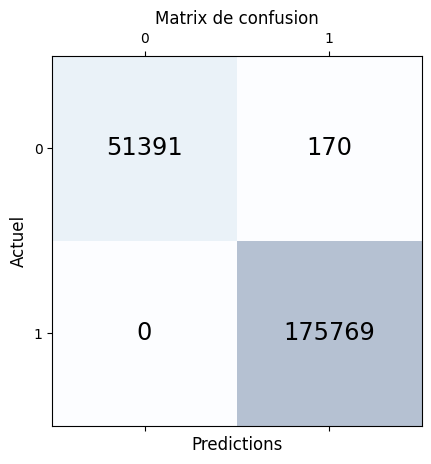

In [14]:
y_pred = random_clf_dpm.predict(X_test_from_dpm)
matrix, scores_ensemble_dmp, ruo_curve_val = test(y_test, y_pred)

fig, ax = plt.subplots()
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuel', fontsize=12)
plt.title('Matrix de confusion', fontsize=12);

In [15]:
view_scores = pd.DataFrame(scores_ensemble_dmp, index=[0])
view_scores

,precision,error,f1-score,recall,accuracy,roc_auc_score
0,0.999034,0.000748,0.999517,1.0,0.999252,0.998351
